## **Input Library**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        # Import Library Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Load Data**

In [ ]:
# Downloading Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK" -O train.csv && rm -rf /tmp/cookies.txt

--2022-10-30 13:58:02--  https://docs.google.com/uc?export=download&confirm=t&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.113, 172.217.204.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kme80pt6141528jsorr9967o9uevjjmc/1667138250000/12463189437916965899/*/1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK?e=download&uuid=f11abe13-ca99-4416-82a9-8d48821c11ec [following]
--2022-10-30 13:58:02--  https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kme80pt6141528jsorr9967o9uevjjmc/1667138250000/12463189437916965899/*/1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK?e=download&uuid=f11abe13-ca99-4416-82a9-8d48821c11ec
Resolving doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)... 173.194.216.

In [ ]:
# Downloading Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6" -O test.csv && rm -rf /tmp/cookies.txt

--2022-10-30 13:58:06--  https://docs.google.com/uc?export=download&confirm=t&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6
Resolving docs.google.com (docs.google.com)... 172.217.204.139, 172.217.204.100, 172.217.204.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ai4vo291qe4b5b4b1flvemj86metnvs/1667138250000/12463189437916965899/*/1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6?e=download&uuid=1fb83ca9-e8c4-44fe-bf9a-1289ac0be18f [following]
--2022-10-30 13:58:06--  https://doc-08-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0ai4vo291qe4b5b4b1flvemj86metnvs/1667138250000/12463189437916965899/*/1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6?e=download&uuid=1fb83ca9-e8c4-44fe-bf9a-1289ac0be18f
Resolving doc-08-bg-docs.googleusercontent.com (doc-08-bg-docs.googleusercontent.com)... 173.194.216.

In [ ]:
train = pd.read_csv("./train.csv")

test = pd.read_csv("./test.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **Data Pre-processing - Feature Engineering**

In [ ]:
# Mengubah tipe data tanggal datang dan pulang
train["tgl_datang"] = pd.to_datetime(train["tgl_datang"], format='%Y-%m-%d')
train["tgl_pulang"] = pd.to_datetime(train["tgl_pulang"], format='%Y-%m-%d')

# Mengubah tipe data tanggal datang dan pulang
test["tgl_datang"] = pd.to_datetime(test["tgl_datang"], format='%Y-%m-%d')
test["tgl_pulang"] = pd.to_datetime(test["tgl_pulang"], format='%Y-%m-%d')

In [ ]:
# Menambah Kolom Lama Rawat
train["lama_rawat"] = (train["tgl_pulang"]-train["tgl_datang"]).dt.days.astype(int)
test["lama_rawat"] = (test["tgl_pulang"]-test["tgl_datang"]).dt.days.astype(int)

In [ ]:
# Menambah Kolom Tanggal/Bulan/Tahun
train["hari"] = train["tgl_datang"].dt.dayofweek.astype(int)
test["hari"] = test["tgl_datang"].dt.dayofweek.astype(int)

train["is_weekend"] = (train["tgl_datang"].dt.dayofweek.astype(int)>5).map({True:1,False:0})
test["is_weekend"] = (test["tgl_datang"].dt.dayofweek.astype(int)>5).map({True:1,False:0})

train["haripadatahun"] = train["tgl_datang"].dt.dayofyear.astype(int)
test["haripadatahun"] = test["tgl_datang"].dt.dayofyear.astype(int)

train["pekanpadatahun"] = train["tgl_datang"].dt.weekofyear.astype(int)
test["pekanpadatahun"] = test["tgl_datang"].dt.weekofyear.astype(int)

train["tanggal"] = train["tgl_datang"].dt.day.astype(int)
test["tanggal"] = test["tgl_datang"].dt.day.astype(int)

train["bulan"] = train["tgl_datang"].dt.month.astype(int)
test["bulan"] = test["tgl_datang"].dt.month.astype(int)

train["tahun"] = train["tgl_datang"].dt.year.astype(int)
test["tahun"] = test["tgl_datang"].dt.year.astype(int)

train["quarter"] = train["tgl_datang"].dt.quarter.astype(int)
test["quarter"] = test["tgl_datang"].dt.quarter.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == "":


In [ ]:
#Apakah dirujuk
train["tidak_dirujuk"] = np.where(train.jenis_fkr == 98, 1, 0)
test["tidak_dirujuk"] = np.where(test.jenis_fkr == 98, 1, 0)

In [ ]:
#Encode label
train["label"] = train["label"].map({"Belum_Sehat":0,"Sehat":1})

In [ ]:
# Import label encoder
from sklearn import preprocessing

data = pd.concat([train,test])

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data["kode_diag_icd"]=data["kode_diag_icd"].astype(str)
data["kode_diag_icd"]= label_encoder.fit_transform(data["kode_diag_icd"])

label_encoder = preprocessing.LabelEncoder()
data["kode_diag"]=data["kode_diag"].astype(str)
data["kode_diag"]= label_encoder.fit_transform(data["kode_diag"])

train=data[(data["label"]==1) | (data["label"]==0)]
test=data[(data["label"]!=1) & (data["label"]!=0)]

test = test.drop(columns="label")

In [ ]:
train=train.drop(columns=["tgl_datang","tgl_pulang","id_peserta","id_keluarga"])
test=test.drop(columns=["tgl_datang","tgl_pulang","id_peserta","id_keluarga"])

In [ ]:
# train=train.drop(columns=["tgl_datang","tgl_pulang"])
# test=test.drop(columns=["tgl_datang","tgl_pulang"])

In [ ]:
X = train.drop(columns=["label"])
y = train["label"]

X["poli_fktp"]=X["poli_fktp"].astype(int)
test["poli_fktp"]=test["poli_fktp"].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=32498)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056897 entries, 0 to 4056896
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   bobot                 float64
 1   provinsi_fktp         int64  
 2   kota_fktp             int64  
 3   kepemilikan_fktp      int64  
 4   jenis_fktp            int64  
 5   tipe_fktp             int64  
 6   tingkatpel_fktp       int64  
 7   poli_fktp             int64  
 8   segmen_peserta_fktp   int64  
 9   kode_diag_icd         int64  
 10  kode_diag             int64  
 11  provinsi_fkr          int64  
 12  kota_fkr              int64  
 13  kepemilikan_fkr       int64  
 14  jenis_fkr             int64  
 15  tipe_fkr              int64  
 16  poli_fkr              int64  
 17  jenis_kunjungan_fktp  int64  
 18  lama_rawat            int64  
 19  hari                  int64  
 20  is_weekend            int64  
 21  haripadatahun         int64  
 22  pekanpadatahun        int64  
 23  tanggal

## **Modeling**

### XGBoost Tuning with Bayesian Optimization

In [ ]:
from scipy.stats import randint
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error, f1_score, make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaYStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

In [ ]:
from time import time

import pprint
"""
A wrapper for measuring time and performances of different optmizers

optimizer = a sklearn or a skopt optimizer
X = the training set
y = our target
title = a string label for the experiment
"""
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# 5-fold StratifiedCV
kf = KFold(n_splits=5, shuffle=True, random_state=8)

# Scorer
scorer = make_scorer(f1_score)

# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': [5,10,15,20],
                 'min_child_weight': Real(0.1, 1),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': [0.001, 0.01, 0.1, 0.5, 1], # L2 regularization
                 'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100], # L1 regularization
                 'n_estimators': Integer(50, 5000),
                 'scale_pos_weight':Real(1.0, 5.0, 'uniform')
   }


opt = BayesSearchCV(xgb,
                    search_spaces,
                    scoring='f1',
                    cv=kf,
                    n_jobs=1,
                    n_iter=20,# use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    verbose=100)

In [ ]:
best_params = report_perf(opt, X, y,'XGBoost',
#best_params = report_perf(opt, trainx, trainy,'CatBoost',
                          callbacks=[DeltaYStopper(0.0001)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.31651589415849446, learning_rate=0.20698521676260967, max_depth=10, min_child_weight=0.8209174689820261, n_estimators=867, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=3.752527750981464, subsample=0.6193635243820886
[CV 1/5; 1/1] END colsample_bytree=0.31651589415849446, learning_rate=0.20698521676260967, max_depth=10, min_child_weight=0.8209174689820261, n_estimators=867, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=3.752527750981464, subsample=0.6193635243820886;, score=0.999 total time= 1.1min
[CV 2/5; 1/1] START colsample_bytree=0.31651589415849446, learning_rate=0.20698521676260967, max_depth=10, min_child_weight=0.8209174689820261, n_estimators=867, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=3.752527750981464, subsample=0.6193635243820886
[CV 2/5; 1/1] END colsample_bytree=0.31651589415849446, learning_rate=0.20698521676260967, max_depth=10, min_child_weight=0.820917468982

### XGBoost Default

In [ ]:
#XGBDefault
xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=5))

              precision    recall  f1-score   support

         0.0    0.99963   0.99943   0.99953    658957
         1.0    0.99895   0.99932   0.99913    355268

    accuracy                        0.99939   1014225
   macro avg    0.99929   0.99938   0.99933   1014225
weighted avg    0.99939   0.99939   0.99939   1014225



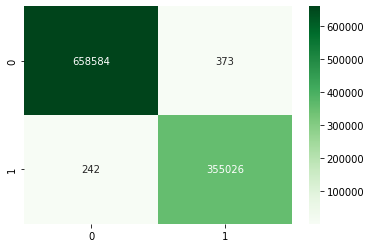

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

### XGBoost with scale_pos_weight tuned

In [ ]:
#XGBScalePosWeight
xgb2 = XGBClassifier(tree_method='gpu_hist',scale_pos_weight=1.85481664546)
xgb2.fit(X_train, y_train)
y_pred_xgb= xgb2.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=5))

              precision    recall  f1-score   support

         0.0    0.99981   0.99917   0.99949    658957
         1.0    0.99845   0.99965   0.99905    355268

    accuracy                        0.99933   1014225
   macro avg    0.99913   0.99941   0.99927   1014225
weighted avg    0.99934   0.99933   0.99933   1014225



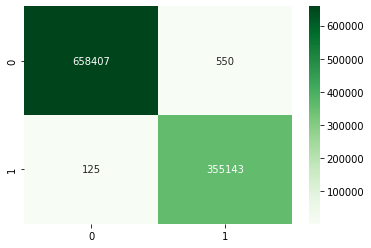

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

### XGBoost Tuned

In [ ]:
xgb_tuned = XGBClassifier(colsample_bytree=0.49309299633453885,learning_rate=0.09082965940463038,
                    max_depth=10,min_child_weight=1,n_estimators=694,
                    reg_alpha=0.1,reg_lambda=1,
                    scale_pos_weight=4.6847053521598830,
                    subsample=1,
                    tree_method='gpu_hist')

xgb_tuned.fit(X_train, y_train)
y_pred_xgb= xgb_tuned.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=7))

              precision    recall  f1-score   support

         0.0  0.9998436 0.9994491 0.9996463    658957
         1.0  0.9989790 0.9997101 0.9993444    355268

    accuracy                      0.9995405   1014225
   macro avg  0.9994113 0.9995796 0.9994954   1014225
weighted avg  0.9995408 0.9995405 0.9995406   1014225



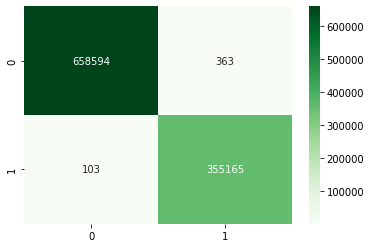

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

### Ensemble Learning Voting

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[xgb, xgb2, xgb_tuned], weights=[1,1,1.1], voting="soft")

eclf.fit(X_train, y_train)
y_pred_eclf = eclf.predict(X_val)
print(classification_report(y_val, y_pred_eclf, digits=5))

              precision    recall  f1-score   support

         0.0    0.99981   0.99939   0.99960    658957
         1.0    0.99887   0.99965   0.99926    355268

    accuracy                        0.99948   1014225
   macro avg    0.99934   0.99952   0.99943   1014225
weighted avg    0.99948   0.99948   0.99948   1014225



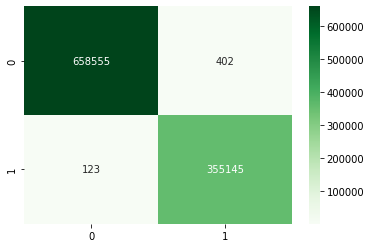

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_eclf)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

### Ensemble Learning Stacking

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


clf = StackingClassifier(estimators=[('xgb1',xgb), ('xgb2',xgb2), ('xgb3',xgb_tuned)], final_estimator=LogisticRegression())

clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_val)
print(classification_report(y_val, y_pred_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    658957
         1.0       1.00      1.00      1.00    355268

    accuracy                           1.00   1014225
   macro avg       1.00      1.00      1.00   1014225
weighted avg       1.00      1.00      1.00   1014225



In [ ]:
print(classification_report(y_val, y_pred_clf, digits=5))

              precision    recall  f1-score   support

         0.0    0.99972   0.99950   0.99961    658957
         1.0    0.99907   0.99948   0.99928    355268

    accuracy                        0.99949   1014225
   macro avg    0.99940   0.99949   0.99944   1014225
weighted avg    0.99949   0.99949   0.99949   1014225



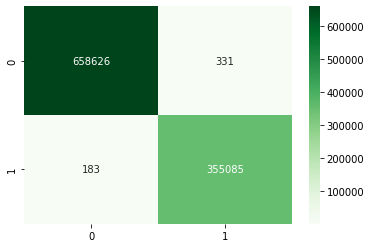

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_clf)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf2 = StackingClassifier(classifiers =[xgb, xgb2, xgb_tuned], meta_classifier = SVC(kernel='linear',C=1, degree=3) , use_probas = True)

clf2.fit(X_train, y_train)
y_pred_clf2 = clf2.predict(X_val)
print(classification_report(y_val, y_pred_clf2, digits=7))

              precision    recall  f1-score   support

         0.0  0.9997071 0.9995781 0.9996426    658957
         1.0  0.9992177 0.9994567 0.9993372    355268

    accuracy                      0.9995356   1014225
   macro avg  0.9994624 0.9995174 0.9994899   1014225
weighted avg  0.9995356 0.9995356 0.9995356   1014225



### Ensemble Learning Stacking Tuned

In [ ]:
#XGBDefault
xgb = XGBClassifier(tree_method='gpu_hist')
#XGBScalePosWeight
xgb2 = XGBClassifier(tree_method='gpu_hist',scale_pos_weight=1.85481664546)
#XGBTuned
xgb_tuned = XGBClassifier(colsample_bytree=0.49309299633453885,learning_rate=0.09082965940463038,
                    max_depth=10,min_child_weight=1,n_estimators=694,
                    reg_alpha=0.1,reg_lambda=1,
                    scale_pos_weight=4.6847053521598830,
                    subsample=1,
                    tree_method='gpu_hist')

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf2 = StackingClassifier(classifiers =[xgb, xgb2, xgb_tuned], meta_classifier = SVC(kernel='linear',C=1, degree=3) , use_probas = True)

In [ ]:
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = clf2,
                    param_grid = params,
                    cv = 5,
                    scoring = "f1",
                    verbose = 1000,
                    n_jobs = 1)

# Fit GridSearchCV
grid.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear
[CV 1/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear;, score=0.999 total time= 2.3min
[CV 2/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear
[CV 2/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear;, score=0.999 total time= 2.3min
[CV 3/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear
[CV 3/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear;, score=0.999 total time= 2.3min
[CV 4/5; 1/18] START meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear
[CV 4/5; 1/18] END meta_classifier__C=1, meta_classifier__degree=3, meta_classifier__kernel=linear;, score=0.999 total time= 2.3min
[CV 5/5

GridSearchCV(cv=5,
             estimator=StackingClassifier(classifiers=[XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     gamma=None,
                                                                     gpu_id=None,
        

In [ ]:
print(grid.best_score_)

0.9993244630717436


In [ ]:
grid.best_params_

{'meta_classifier__C': 1,
 'meta_classifier__degree': 3,
 'meta_classifier__kernel': 'linear'}

In [ ]:
# print("Cross Validation Scores are {}".format(scores))
# print("Average Cross Validation score :{}".format(scores.mean()))

Cross Validation Scores are [0.99933922 0.99929355 0.99933569 0.99929176 0.99935155]
Average Cross Validation score :0.9993223546100236


## **Submission**

In [ ]:
#submission
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EQhhcFJZZ_qj7aYA04uU_ygv4dBBDBtr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1EQhhcFJZZ_qj7aYA04uU_ygv4dBBDBtr" -O submission.csv && rm -rf /tmp/cookies.txt

--2022-10-30 11:56:16--  https://docs.google.com/uc?export=download&confirm=&id=1EQhhcFJZZ_qj7aYA04uU_ygv4dBBDBtr
Resolving docs.google.com (docs.google.com)... 74.125.196.101, 74.125.196.100, 74.125.196.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.196.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j76eoslatvaikc72i8qrali3l431j436/1667130975000/12463189437916965899/*/1EQhhcFJZZ_qj7aYA04uU_ygv4dBBDBtr?e=download&uuid=d5cecf6c-e090-4ccf-947d-472ca676edbc [following]
--2022-10-30 11:56:17--  https://doc-10-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j76eoslatvaikc72i8qrali3l431j436/1667130975000/12463189437916965899/*/1EQhhcFJZZ_qj7aYA04uU_ygv4dBBDBtr?e=download&uuid=d5cecf6c-e090-4ccf-947d-472ca676edbc
Resolving doc-10-bg-docs.googleusercontent.com (doc-10-bg-docs.googleusercontent.com)... 173.194.215.132, 

In [ ]:
submission_ = pd.read_csv("submission.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
clf2.fit(X,y)

StackingClassifier(classifiers=[XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=0, grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max...
                                              importance_type=None,
          

In [ ]:
predictions = clf2.predict(test)

In [ ]:
import numpy as np

submission = pd.DataFrame({
    "" : np.array(range(1,len(test)+1)).astype(str),
    "FKP02": submission_["FKP02"].astype(str),
    "Status": np.array(predictions).astype(int)
    })
# submission["Status"] = submission["Status"].map({1:"Sehat", 0:"Belum_Sehat"})
submission.to_csv("submission.csv", index=False, quoting=2)

In [ ]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv